In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import newton
from scipy.interpolate import lagrange, CubicHermiteSpline, CubicSpline
import sympy as sp 

#1. Movimiento de proyectiles en presencia de viento.

##Definición de funciones

```
# Tiene formato de código
```



In [10]:
alpha, theta_0, v0, u, b, g = np.pi, np.deg2rad(45), 60, 30, 0.05, 9.8 
 
A = u*np.cos(alpha)
B = (v0*np.cos(theta_0)-u*np.cos(alpha))/b
C = (g/b + v0*np.sin(theta_0)-u*np.sin(alpha))/b
D = g/b - u*np.sin(alpha)

def x  (t, A, B):
  """
  
  Posición horizontal en función del tiempo

  """
  X = 1 - np.exp(-b*t)
  return A*t + B*X

def y  (t, C, D):
  """
  
  Posición vertical en función del tiempo

  """
  X = 1 - np.exp(-b*t)
  return C*X - D*t

def x_max (theta):

  """
  
  Alcance maximo en función del ángulo

  """
  
  A = u*np.cos(alpha)
  B = (v0*np.cos(theta)-u*np.cos(alpha))/b
  
  def y_var (t):
    C = (g/b + v0*np.sin(theta)-u*np.sin(alpha))/b
    D = g/b - u*np.sin(alpha)
    X = 1 - np.exp(-b*t)
    
    return C*X - D*t
  
  t_max = newton(y_var,10)
  X = 1 - np.exp(-b*t_max)
  
  return A*t_max + B*X

##Creación de dataframe

In [11]:
dom = np.linspace(0,10,100)
data = pd.DataFrame({'t': dom,
                     'X': x(dom, A, B),
                     'Y': y(dom, C, D)})

##Graficación

Text(0.5, 1.0, 'Moviento vertical')

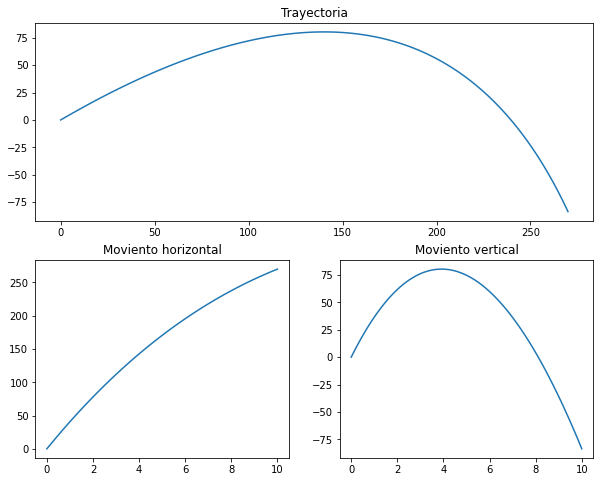

In [12]:
fig = plt.figure(figsize = (10,8))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

ax1.plot(data.X, data.Y)
ax1.set_title('Trayectoria')

ax2.plot(data.t, data.X)
ax2.set_title('Moviento horizontal')

ax3.plot(data.t, data.Y)
ax3.set_title('Moviento vertical')

##Desplazamiento maximo

In [13]:
t_max = newton(y, 8, args=(C,D))
print(f'El alcance maximo de la particula, con un angulo inicial de 45°, fue de {x(t_max, A, B):.2f} metros')


El alcance maximo de la particula, con un angulo inicial de 45°, fue de 239.61 metros


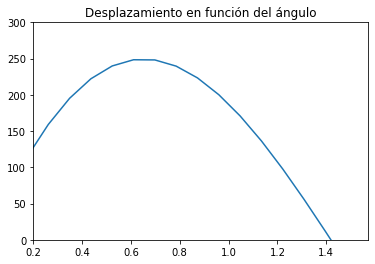

In [14]:
angles = np.arange(np.deg2rad(10), (np.pi/2)+0.001, np.deg2rad(5))

fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.set_title('Desplazamiento en función del ángulo')

plt.ylim(0,300)
plt.xlim(0.2,np.pi/2)

ax.plot(angles,[x_max(angle) for angle in angles])

Resultados acordes con la teoría, pues se sabe que entre mas cercano el angulo
a 45° mayor será el alcance, lo que corresponde con una gráfica de una parábola

#Interpolación lagrange
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}

#Grafica inicial de la función

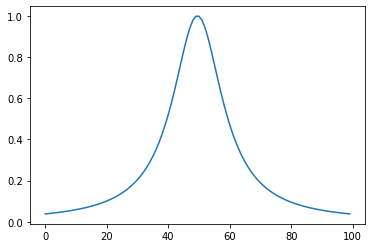

In [23]:
f_s = lambda x: 1/(1+25*x**2)
plt.plot(f_s(np.linspace(-1,1,100)))

#Interpolación de lagrange

In [59]:
dom5 = np.array([4,8,12,16,20])
ran5 = f_s(dom5)
L_inter = lagrange(dom5, ran5)

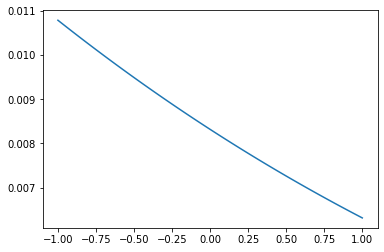

In [60]:
plt.plot(np.linspace(-1,1,100),
         L_inter(np.linspace(-1,1,100)))

#Derivada

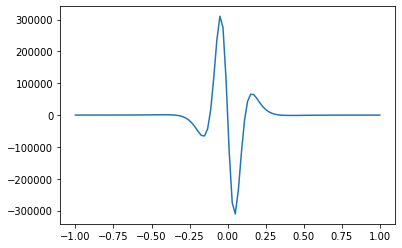

In [20]:
sp.init_printing() 

x = sp.symbols("x") 
f_s(x)
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') 

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()

#Interpolación de Hermite


In [65]:
x = sp.symbols("x") 
f_s(x)
df5 = sp.diff(f_s(x),x, 1)
dfxn5 = sp.lambdify(x,df5,'numpy') 
H_inter = CubicHermiteSpline(dom5, ran5, dfxn5(dom5))

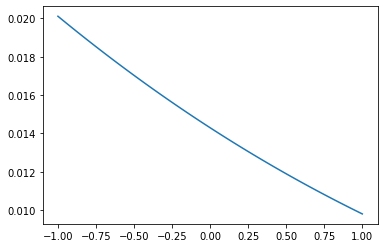

In [66]:
y_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(y_, H_inter(y_))

Se observan que la curva de interpolación sigue el mismo comportamiento que con la interpolación de lagrange.

#Spline Cubico
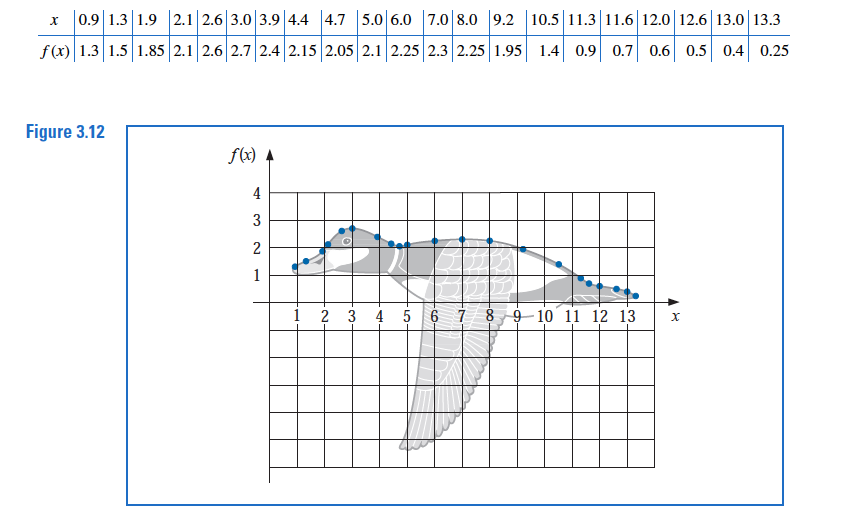

#Datos

In [69]:
data = pd.DataFrame({'x':[0.9,1.3,1.9,2.1,2.6,3.0, 3.9,
             4.4, 4.7, 5.0, 6.0, 7.0, 8.0,
             9.2, 10.5, 11.3, 11.6, 12.0,
             12.6, 13.0, 13.3],
        'fx':[1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15,
              2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9,
              0.7, 0.6, 0.5, 0.4, 0.25]})
data.head()

,x,fx
0,0.9,1.30
1,1.3,1.50
2,1.9,1.85
3,2.1,2.10
4,2.6,2.60


#Acercamiento por Lagrange

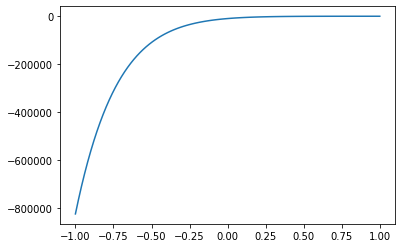

In [77]:
L2_inter = lagrange(data.x, data.fx)
plt.plot(np.linspace(-1,1,100),
         L2_inter(np.linspace(-1,1,100)))

#Interpolación por Spline Cubico

In [71]:
C_inter = CubicSpline(np.sort(data.x), data.fx)

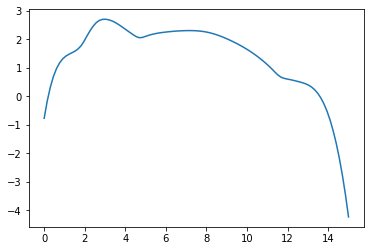

In [76]:
z_ = np.linspace(0, 15, 100)

plt.figure()
plt.plot(z_, C_inter(z_))